In [2]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#from imutils import paths
import numpy as np
import argparse
import cv2
import imutils
import os
import pandas as pd

ModuleNotFoundError: No module named 'imutils'

In [3]:
def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [5]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	# handle normalizing the histogram if we are using OpenCV 2.4.X
	
	cv2.normalize(hist, hist)
	# return the flattened histogram as the feature vector
	return hist.flatten()

In [6]:
def org_feature(image):
    # Applying the function
    gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create(nfeatures=2000)
    kp, des = orb.detectAndCompute(gray_scale, None)
  
# Drawing the keypoints
    kp_image = cv2.drawKeypoints(gray_scale, kp, None, color=(0, 255, 0), flags=0)
    #cv2.normalize(kp_image, kp_image)
    return kp_image.flatten()

In [7]:
def SIFT_Feature(image):
    gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#initialize SIFT object
    sift = cv2.SIFT_create()

#detect keypoints
    keypoints, _= sift.detectAndCompute(image, None)
#draw keypoints
    sift_image = cv2.drawKeypoints(gray_scale, keypoints, None)
    #cv2.normalize(sift_image, sift_image)
    return sift_image.flatten()

In [8]:
from statistics import mean
def Average(lst):
    return mean(lst)

In [9]:
 # get the filenames of the leaves under the directory “Leaves”
 image_path_list = os.listdir("bananas_cropped")
 # looking at the first image
 #i = 0
 #image_path = image_path_list[i]
 #image = rgb2gray(imread("bananas_cropped/"+image_path))
 #imshow((image))

In [10]:
# grab the list of images that we'll be describing
print("[INFO] describing images...")
#imagePaths = list(os.listdir(image_path_list))
# initialize the raw pixel intensities matrix, the features matrix,
# and labels list
rawImages = []
features = []
labels = []
org_fe=[]
sift=[]

[INFO] describing images...


In [11]:
for i in range(len(image_path_list)):
	# load the image and extract the class label (assuming that our
	# path as the format: /path/to/dataset/{class}.{image_num}.jpg
	image_path = image_path_list[i]
	#image = rgb2gray(imread("bananas_cropped/"+image_path))
	image = cv2.imread("bananas_cropped/"+image_path)
	label = image_path[0:14]
	# extract raw pixel intensity "features", followed by a color
	# histogram to characterize the color distribution of the pixels
	# in the image
	
	org=org_feature(image)
	pixels = image_to_feature_vector(image)
	hist = extract_color_histogram(image)
	sift_fe=SIFT_Feature(image)
	# update the raw images, features, and labels matricies,
	# respectively
	rawImages.append(pixels)
	features.append(hist)
	org_fe.append(Average(org))
	sift.append(Average(sift_fe))
	labels.append(label)
	# show an update every 1,000 images
	if i > 0 and i % 1000 == 0:
		print("[INFO] processed {}/{}".format(i, len(image_path)))

In [12]:
import pandas as pd

In [13]:
df_raw_images = pd.DataFrame(rawImages)

In [14]:
df_hist=pd.DataFrame(hist)

In [16]:
df_sift=pd.DataFrame(sift)

In [15]:
df_org=pd.DataFrame(org_fe)

In [17]:
df_img=pd.DataFrame(labels)
df_sift_org=pd.merge(df_sift,df_org,left_index=True, right_index=True)

In [28]:
df_all_feature1=pd.merge(df_img,df_raw_images, left_index=True, right_index=True)

In [21]:
df_all_feature3=pd.merge(df_all_feature2,df_hist, left_index=True, right_index=True)

In [29]:
df_all_feature=pd.merge(df_all_feature1,df_hist, left_index=True, right_index=True)

In [30]:
df_all_feature.head

<bound method NDFrame.head of                 0_x  0_y   1    2   3    4    5   6   7   8  ...  3063  3064  \
0     Bananas_1.jpg  -16 -21  -24  -9  -20  -27 -16 -24 -24  ...    40    73   
1    Bananas_10.jpg  -24 -30  -31  79   53   38  74  45  30  ...    11    22   
2    Bananas_100.jp   70  72   61  49   45   41  47  43  31  ...    35   100   
3    Bananas_101.jp   47  46   36 -39  -43  -48  37  40  28  ...    46    98   
4    Bananas_102.jp   -8 -11  -16  87   64   46  77  60  52  ...     2    18   
..              ...  ...  ..  ...  ..  ...  ...  ..  ..  ..  ...   ...   ...   
417  Cassava_95.jpg   37  55   60   1   15   12  31  53  50  ...     8    37   
418  Cassava_96.jpg    3  22   27  80  100  102   1  14  10  ...    17    44   
419  Cassava_97.jpg    0  16   22  74   93   97   0  20  15  ...    17    44   
420  Cassava_98.jpg   63  96  109  10   17   13  27  48  49  ...     6    30   
421  Cassava_99.jpg   45  84   98   9   22   15  48  62  65  ...     1    21   

     3065

In [31]:
def image_class (row):
   if 'Banana' in row['0_x'] :
      return 1
   if 'Cassava' in row['0_x'] :
      return 0
   return 2

In [27]:
df_all_feature['class_label'] = df_all_feature.apply (lambda row: image_class(row), axis=1)

KeyError: '0_x'

In [167]:
ty=df_all_feature[0]

In [129]:
df_all_feature.head

<bound method NDFrame.head of                 0_x  0_y   1   2   3   4   5   6   7    8  ...  3064  3065  \
0     Bananas_1.jpg  -16 -21 -24  -9 -20 -27 -16 -24  -24  ...    73    62   
1    Bananas_10.jpg  -24 -30 -31  79  53  38  74  45   30  ...    22    20   
2    Bananas_100.jp   70  72  61  49  45  41  47  43   31  ...   100    76   
3    Bananas_101.jp   47  46  36 -39 -43 -48  37  40   28  ...    98    80   
4    Bananas_102.jp   -8 -11 -16  87  64  46  77  60   52  ...    18    11   
..              ...  ...  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...   
507  Bananas_176.jp  -18 -24 -29  86  60  50 -23 -28  -26  ...    29    20   
508  Bananas_177.jp  -50 -55 -60  81  57  42  -9 -21  -21  ...    27    19   
509  Bananas_178.jp  -10 -16 -21  92  59  41 -85 -98 -101  ...    20    18   
510  Bananas_179.jp  -75 -79 -84  86  63  40  87  70   61  ...    24    15   
511  Bananas_18.jpg  -26 -29 -33  70  51  34  67  46   31  ...    77    71   

     3066  3067  3068  3069  3070

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

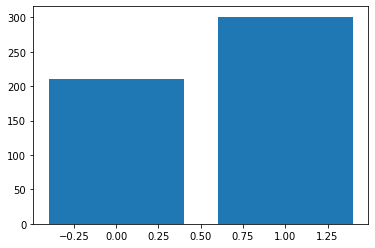

In [130]:
plt.bar(df_all_feature['class_label'].value_counts().index, df_all_feature['class_label'].value_counts().values)
plt.show()

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
#Standardizing the Input Features
from sklearn.preprocessing import StandardScaler

In [161]:
y = df_all_feature['class_label']
X = df_all_feature.drop('class_label', axis = 1)
X = df_all_feature.drop('0_x', axis = 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)
# Separating the dependent and independent variable
  
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state = 125)
# Splitting the data into training and testing data

[[-0.70530371 -0.70078028 -0.74490106 ...  1.91494954 -0.11048077
   0.83725544]
 [-0.88759321 -0.87276556 -0.88140404 ...  0.44287236 -0.25148561
   0.83725544]
 [ 1.25430841  1.0764009   0.91263519 ... -0.59773393 -0.25460914
   0.83725544]
 ...
 [-0.56858658 -0.60523291 -0.68639978 ... -0.42006944 -0.30503176
   0.83725544]
 [-2.04968877 -1.80912984 -1.91492665 ...  0.79820133 -0.30503176
   0.83725544]
 [-0.93316558 -0.85365608 -0.9204049  ...  1.68652377 -0.30503176
   0.83725544]]


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [162]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [163]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)
#KNeighborsClassifier(...)
print(neigh.predict(X_test))

[1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1]


In [164]:
print(f"Test Accuracy: {np.mean(neigh.score(X_test,y_test))*100:.2f}%")

Test Accuracy: 97.09%


In [165]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
sift

In [ ]:
features

In [ ]:
rawImages

In [ ]:
org_fe

In [149]:
# show some information on the memory consumed by the raw images
# matrix and features matrix
rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(
	rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(
	features.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 2.53MB
[INFO] features matrix: 1.69MB


In [150]:
# partition the data into training and testing splits, using 75%
# of the data for training and the remaining 25% for testing
(trainRI, testRI, trainRL, testRL) = train_test_split(
	rawImages, labels, test_size=0.25, random_state=42)
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(
	features, labels, test_size=0.25, random_state=42)

In [151]:
# train and evaluate a k-NN classifer on the raw pixel intensities
print("[INFO] evaluating raw pixel accuracy...")
model = KNeighborsClassifier(n_neighbors=15)
model.fit(trainRI, trainRL)
acc = model.score(testRI, testRL)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating raw pixel accuracy...
[INFO] raw pixel accuracy: 0.00%


In [152]:
# train and evaluate a k-NN classifer on the histogram
# representations
print("[INFO] evaluating histogram accuracy...")
model = KNeighborsClassifier(n_neighbors=25)
model.fit(trainFeat, trainLabels)
acc = model.score(testFeat, testLabels)
print("[INFO] histogram accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating histogram accuracy...
[INFO] histogram accuracy: 0.00%
